In [96]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import cm
import pandas as pd
import mplhep as hep
hep.style.use("CMS")
import numpy as np
import os

In [97]:
path = "phaseSpacePlots"
fnames = ["pre_w1.csv", "post_correct.csv", "post_drift.csv", "pre_w2.csv", "post_w2_cut_remove_dispersion.csv"]
PLOT_TARGETS = [pd.read_csv(os.path.join(path,i)) for i in fnames]

In [98]:
PLOT_TITLES = ["Initial distribution", "After first wedge", "After drift", "After RF cavity and refocusing", "After second wedge"]
PLOT_AXES = [("x", "Px"), ("y", "Py"), ("t", "Pz")]
PLOT_LABELS = [("x (mm)", "p$_{x}$ [MeV]"), ("y (mm)", "p$_{y}$ [MeV]"), ("t (ns)", "p$_{z}$ [MeV]")]

phaseSpacePlots/pdfs/pre_w1_x_Px_log.pdf
phaseSpacePlots/pdfs/pre_w1_y_Py_log.pdf
phaseSpacePlots/pdfs/pre_w1_t_Pz_log.pdf
phaseSpacePlots/pdfs/post_correct_x_Px_log.pdf
phaseSpacePlots/pdfs/post_correct_y_Py_log.pdf
phaseSpacePlots/pdfs/post_correct_t_Pz_log.pdf
phaseSpacePlots/pdfs/post_drift_x_Px_log.pdf
phaseSpacePlots/pdfs/post_drift_y_Py_log.pdf
phaseSpacePlots/pdfs/post_drift_t_Pz_log.pdf
phaseSpacePlots/pdfs/pre_w2_x_Px_log.pdf
phaseSpacePlots/pdfs/pre_w2_y_Py_log.pdf
phaseSpacePlots/pdfs/pre_w2_t_Pz_log.pdf
phaseSpacePlots/pdfs/post_w2_cut_remove_dispersion_x_Px_log.pdf
phaseSpacePlots/pdfs/post_w2_cut_remove_dispersion_y_Py_log.pdf
phaseSpacePlots/pdfs/post_w2_cut_remove_dispersion_t_Pz_log.pdf


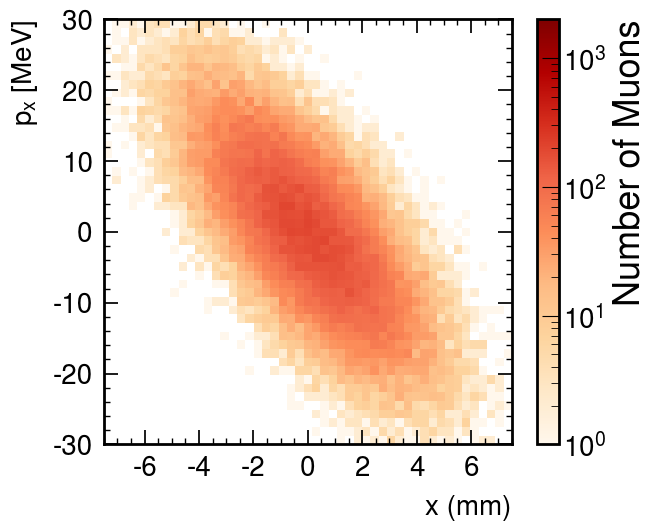

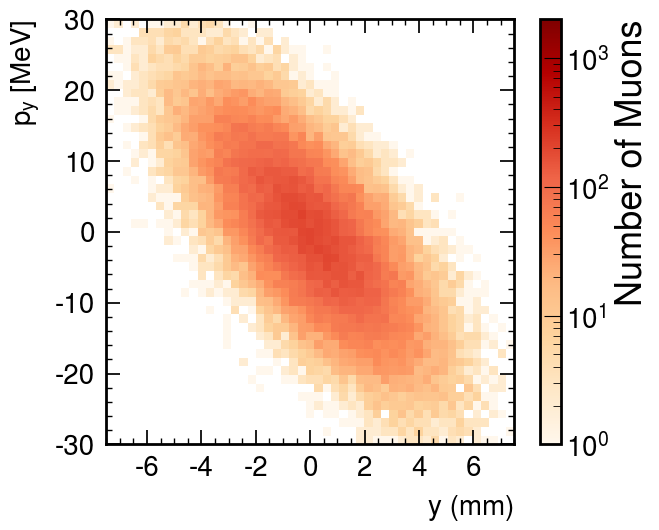

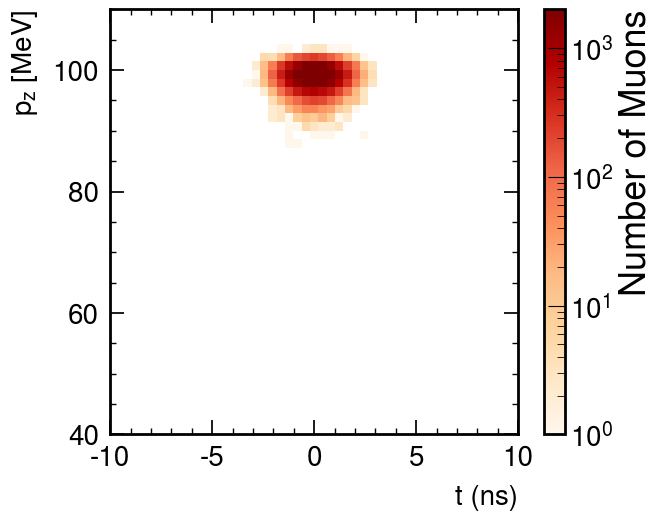

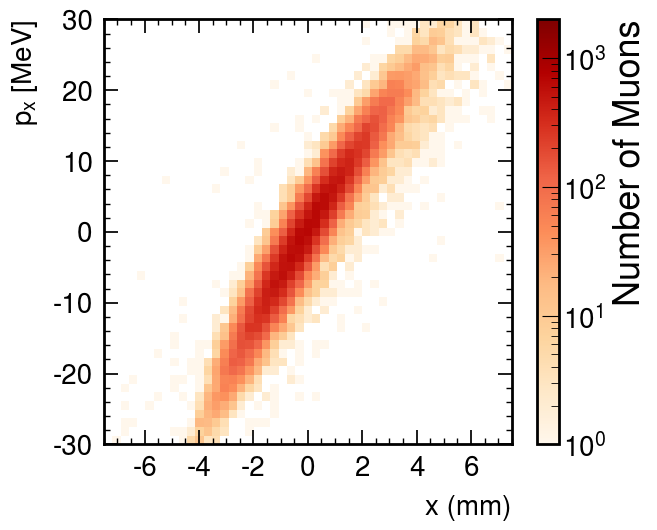

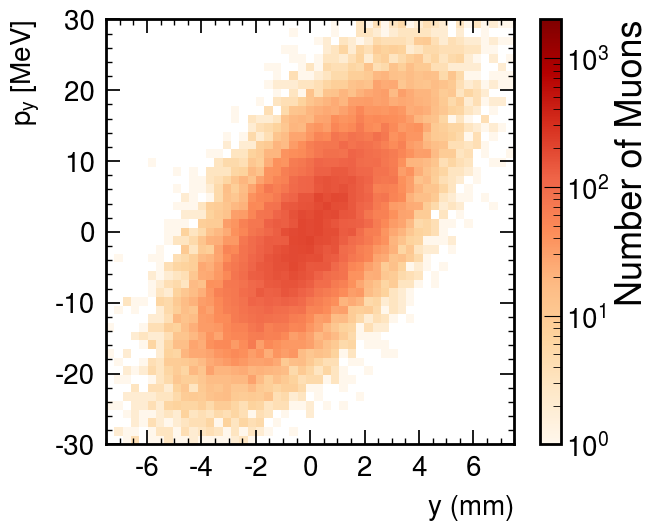

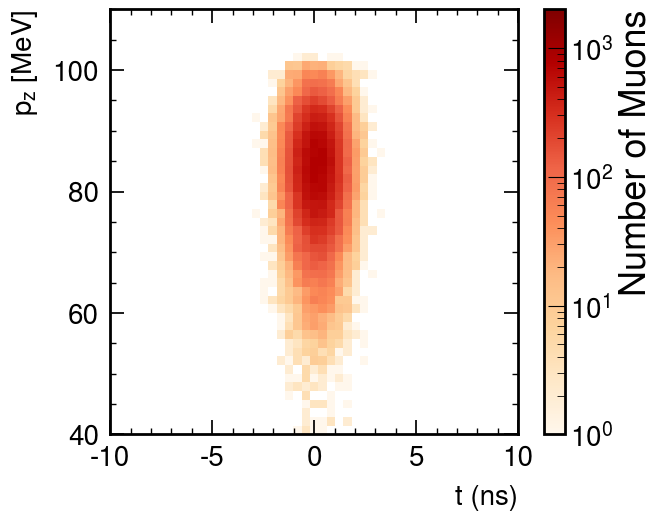

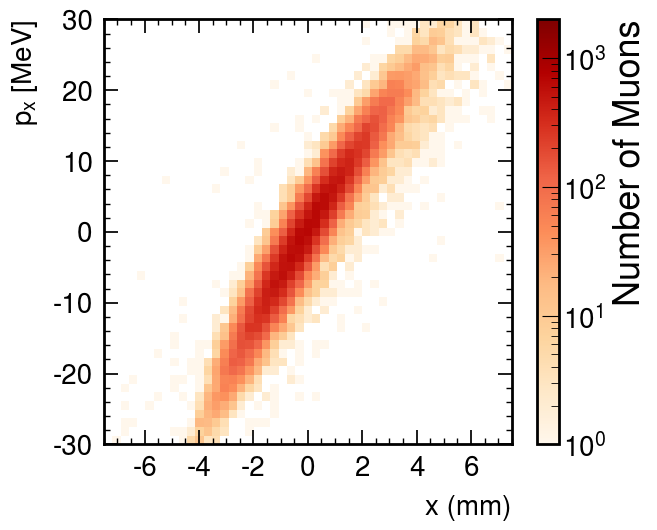

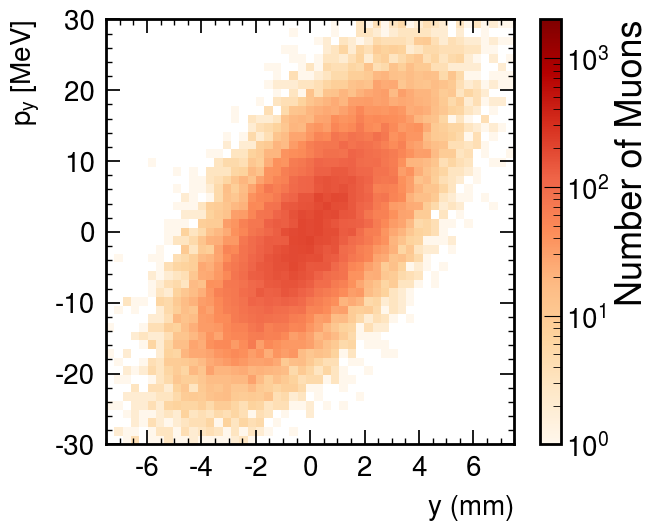

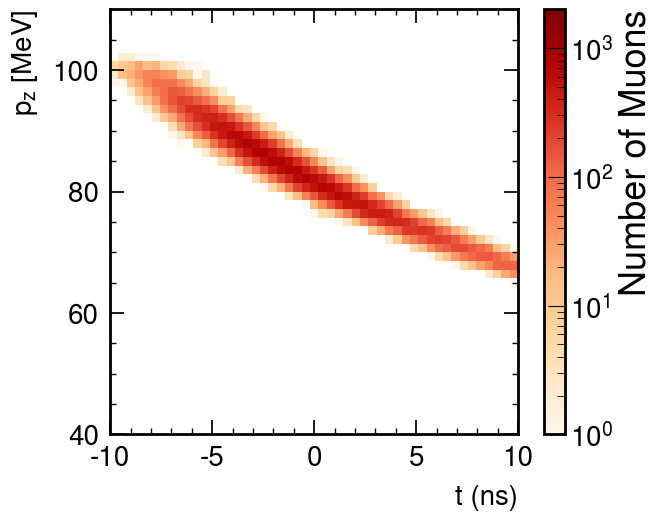

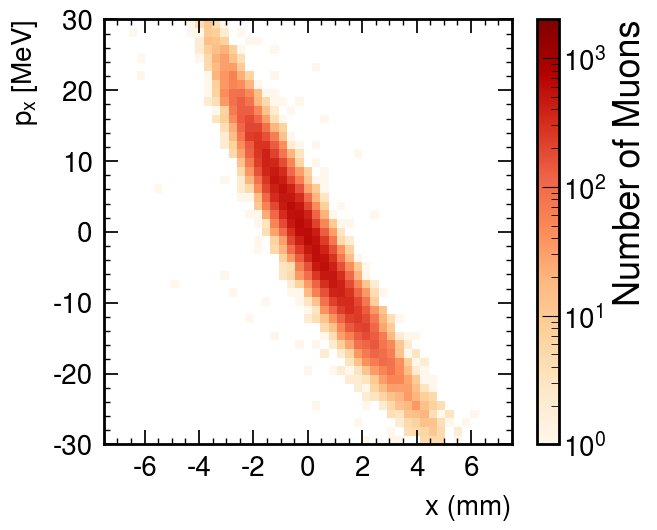

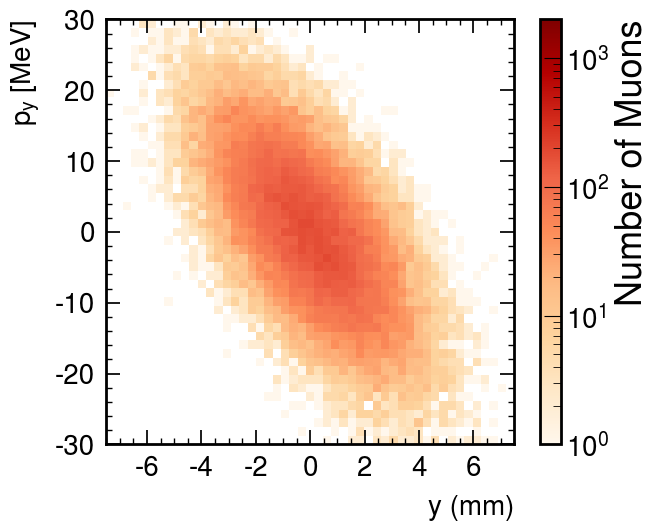

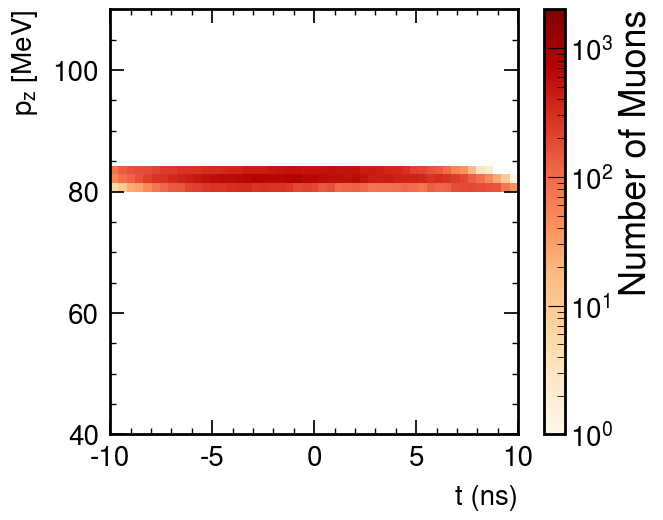

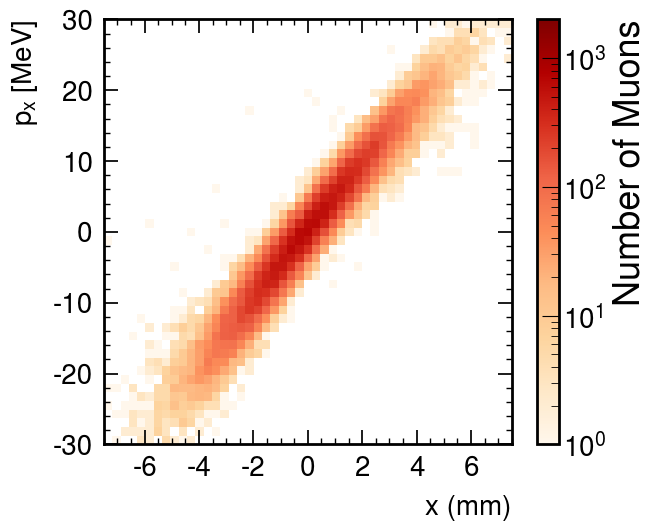

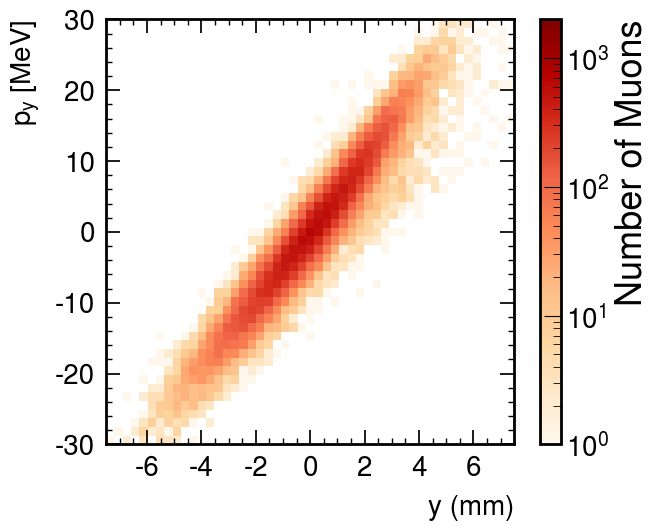

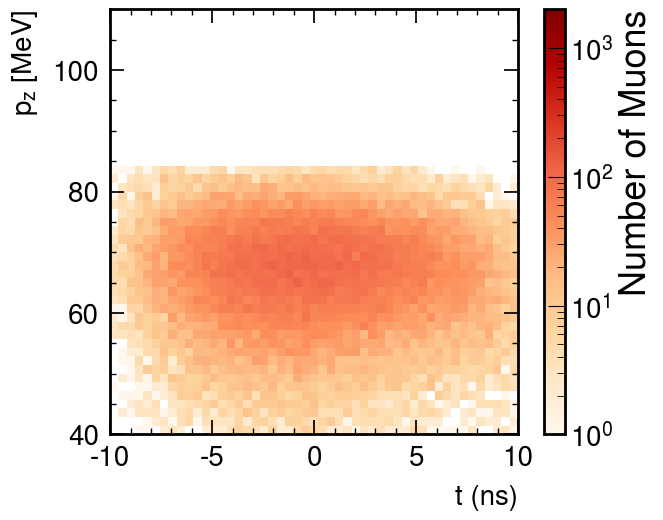

In [105]:
bins_xy = [np.linspace(-7.5, 7.5, 50), np.linspace(-30, 30, 50)]
bins_z = [np.linspace(-10, 10, 50), np.linspace(40, 110, 50)]
zlog = True

for i, df in enumerate(PLOT_TARGETS):
    for j, ((xaxis, yaxis), (xlabel, ylabel)) in enumerate(zip(PLOT_AXES, PLOT_LABELS)):
        
        # make plot
        fig = plt.figure(figsize=(6, 5))
        ax = plt.axes([0.1, 0.1, 0.85, 0.85])

        if zlog:
            h = plt.hist2d(df[xaxis], df[yaxis], bins=bins_z if j == 2 else bins_xy, cmap="OrRd", norm=mpl.colors.LogNorm(vmin=10**0, vmax=2*10**3))
        else:
            h = plt.hist2d(df[xaxis], df[yaxis], bins=bins_z if j == 2 else bins_xy, cmap="OrRd", vmin=0, vmax=2*10**3)
        
        # set labels
        ax.set_xlabel(xlabel, fontsize=20, labelpad=9, horizontalalignment='right', x=1.0)
        ax.set_ylabel(ylabel, fontsize=20, labelpad=9, horizontalalignment='right', y=1.0)
        cbar = plt.colorbar(label="Number of Muons")
        cbar.ax.tick_params(labelsize=20) 
        
        # tick params
        tick_params_major = {"which"     : "major",
                             "length"    : 10,
                             "width"     : 1.25,
                             "direction" : "in",
                             "right"     : True,
                             "top"       : True,
                             "labelsize" : 20,
                             "pad"       : 8}
        tick_params_minor = {"which"     : "minor",
                             "length"    : 4,
                             "width"     : 1,
                             "direction" : "in",
                             "right"     : True,
                             "top"       : True,
                             "labelsize" : 20}
        
        # ax.xaxis.set_minor_locator(AutoMinorLocator(5))
        # ax.yaxis.set_minor_locator(AutoMinorLocator(5))
        ax.tick_params(**tick_params_major)
        ax.tick_params(**tick_params_minor)
        plt.locator_params(axis='y', nbins=5 if j==2 else 8)
        plt.locator_params(axis='x', nbins=7 if j==2 else 8)


        # output name
        outFileName = os.path.join(path, "pdfs", f"{fnames[i].strip('.csv')}_{xaxis}_{yaxis}_{'log' if zlog else 'lin'}.pdf")
        print(outFileName)
        plt.savefig(outFileName, bbox_inches="tight")